In [228]:
%load_ext autoreload
%autoreload
%matplotlib inline

import newspaper
from newspaper import Article, Config
import glob
import json
import pandas as pd
import numpy as np
from IPython.core.debugger import set_trace
from pathlib import Path
from tqdm.auto import tqdm
tqdm.pandas()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
fnames = glob.glob('newsdata/downloaded/*.json')

# 일별 발행갯수 추이

In [3]:
publish_count = {}

for fname in tqdm(fnames):
    js = json.loads(Path(fname).read_text())
    pub = js['pub']
    published_at = js['published_at']

    if pub not in publish_count:
        publish_count[pub] = {}
        
    if published_at not in publish_count[pub]:
        publish_count[pub][published_at] = 0
        
    publish_count[pub][published_at] += 1

In [8]:
df_count = pd.DataFrame.from_dict(publish_count, orient='index').T.sort_index().iloc[-30:-1]
df_count.index = pd.to_datetime(df_count.index); df_count#['heritage']

,abcnews,aljazeera,atlantic,bbc,businessinsider,cbc,cbs,cnbc,cnn,dailybeast,...,thestreet,thinkprogress,time,townhall,vice,washingtonpost,washingtontimes,wsj,yahoo,zdnet
2019-09-04,71.0,NaN,16.0,71.0,140.0,87.0,68.0,55.0,99.0,23.0,...,31.0,6.0,64.0,62.0,16.0,145.0,217.0,52.0,361.0,41.0
2019-09-05,47.0,NaN,28.0,92.0,285.0,73.0,46.0,49.0,84.0,26.0,...,21.0,7.0,14.0,47.0,16.0,116.0,115.0,64.0,178.0,29.0
2019-09-06,50.0,1.0,26.0,86.0,185.0,96.0,50.0,62.0,99.0,27.0,...,34.0,NaN,16.0,41.0,10.0,133.0,128.0,84.0,288.0,36.0
2019-09-07,14.0,NaN,10.0,36.0,175.0,38.0,27.0,22.0,35.0,17.0,...,2.0,NaN,6.0,12.0,10.0,60.0,60.0,25.0,216.0,5.0
2019-09-08,28.0,NaN,7.0,64.0,135.0,51.0,37.0,12.0,46.0,25.0,...,NaN,NaN,8.0,17.0,7.0,87.0,158.0,46.0,259.0,7.0
2019-09-09,66.0,NaN,27.0,89.0,292.0,76.0,60.0,61.0,109.0,29.0,...,26.0,NaN,12.0,46.0,15.0,132.0,190.0,86.0,301.0,41.0
2019-09-10,71.0,2.0,22.0,84.0,351.0,76.0,50.0,63.0,95.0,27.0,...,26.0,NaN,12.0,50.0,16.0,128.0,166.0,68.0,217.0,52.0
2019-09-11,76.0,NaN,22.0,92.0,232.0,76.0,50.0,58.0,102.0,33.0,...,36.0,NaN,13.0,57.0,17.0,127.0,142.0,87.0,279.0,38.0
2019-09-12,80.0,1.0,19.0,103.0,282.0,90.0,57.0,66.0,121.0,30.0,...,42.0,NaN,9.0,63.0,14.0,169.0,239.0,104.0,368.0,32.0
2019-09-13,69.0,1.0,22.0,102.0,317.0,110.0,47.0,60.0,111.0,37.0,...,24.0,NaN,15.0,55.0,NaN,190.0,215.0,120.0,421.0,43.0


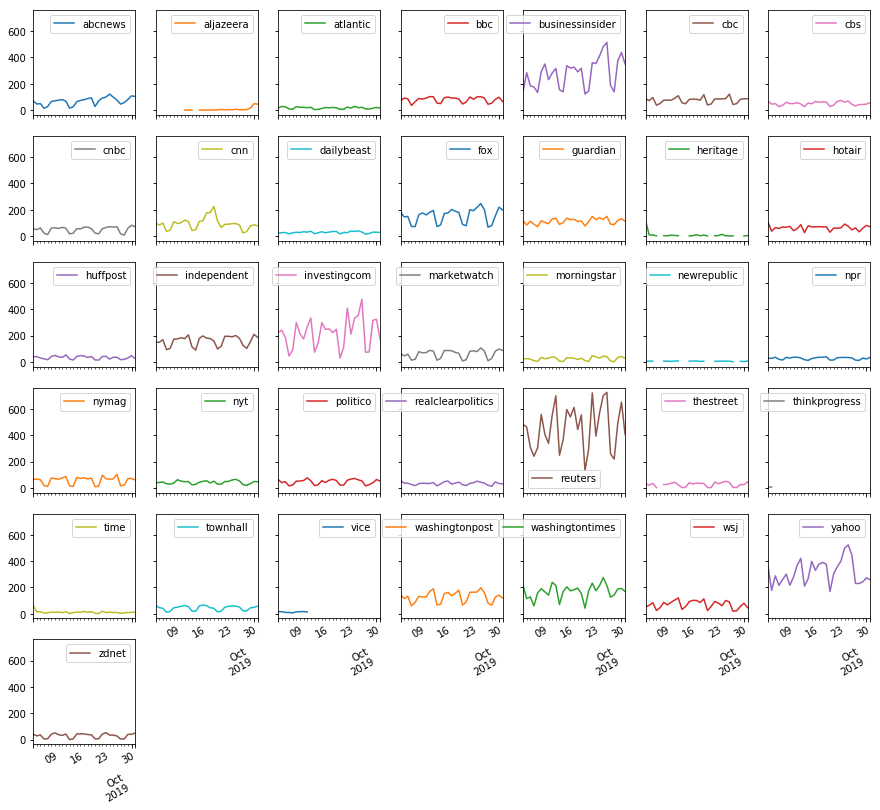

In [9]:
df_count.plot(subplots=True, layout=(6, 7), figsize=(15, 15), sharex=True, sharey=True);

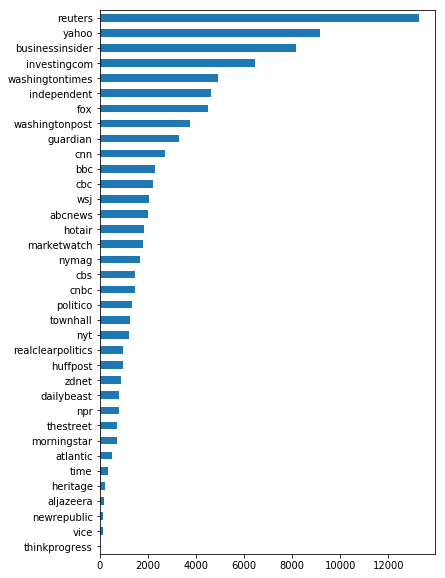

In [10]:
df_count.sum().sort_values().plot.barh(figsize=(6, 10));

# 일별 총 글자수 추이

In [11]:
publish_size = {}

for fname in tqdm(fnames):
    js = json.loads(Path(fname).read_text())
    pub = js['pub']
    published_at = js['published_at']
    size = len(js['text'])

    if pub not in publish_size:
        publish_size[pub] = {}
        
    if published_at not in publish_size[pub]:
        publish_size[pub][published_at] = 0
        
    publish_size[pub][published_at] += size

In [12]:
df_size = pd.DataFrame.from_dict(publish_size, orient='index').T.sort_index().iloc[-30:-1]
df_size.index = pd.to_datetime(df_size.index); df_size#['heritage']

,abcnews,aljazeera,atlantic,bbc,businessinsider,cbc,cbs,cnbc,cnn,dailybeast,...,thestreet,thinkprogress,time,townhall,vice,washingtonpost,washingtontimes,wsj,yahoo,zdnet
2019-09-04,246099.0,NaN,73898.0,290300.0,498066.0,373744.0,205258.0,149587.0,334324.0,135269.0,...,80144.0,22796.0,189118.0,239173.0,72053.0,797406.0,883485.0,164207.0,1213642.0,132824.0
2019-09-05,197578.0,NaN,168445.0,363445.0,956161.0,352332.0,161289.0,123221.0,324097.0,120720.0,...,56365.0,40086.0,69991.0,190855.0,67260.0,844056.0,378854.0,320802.0,560803.0,112775.0
2019-09-06,177591.0,1297.0,112605.0,458844.0,620281.0,425508.0,172292.0,151280.0,321285.0,116364.0,...,97191.0,NaN,58204.0,158166.0,46389.0,852927.0,374479.0,420877.0,892138.0,162313.0
2019-09-07,63649.0,NaN,52918.0,139188.0,600797.0,180272.0,72385.0,61058.0,147898.0,105935.0,...,8554.0,NaN,33299.0,42027.0,63772.0,372183.0,195088.0,125583.0,690729.0,16813.0
2019-09-08,127069.0,NaN,19357.0,261220.0,437166.0,221940.0,177503.0,28576.0,187944.0,208913.0,...,NaN,NaN,23940.0,58061.0,42544.0,541715.0,476886.0,230805.0,845625.0,20839.0
2019-09-09,198846.0,NaN,106960.0,357811.0,925929.0,310589.0,176551.0,219366.0,306941.0,127095.0,...,73200.0,NaN,49509.0,174184.0,59245.0,799227.0,648073.0,370637.0,1010428.0,127411.0
2019-09-10,250422.0,9503.0,76793.0,379691.0,1121303.0,332467.0,138233.0,174568.0,353585.0,125232.0,...,88314.0,NaN,44098.0,197582.0,70783.0,717575.0,507739.0,313307.0,704485.0,179555.0
2019-09-11,264389.0,NaN,121091.0,421692.0,910959.0,292454.0,201684.0,173773.0,380704.0,179653.0,...,124017.0,NaN,42483.0,228371.0,64233.0,835250.0,414040.0,443048.0,1012352.0,131376.0
2019-09-12,304782.0,7257.0,95302.0,396318.0,897693.0,354765.0,180226.0,153377.0,462888.0,132328.0,...,138632.0,NaN,52329.0,226641.0,56256.0,1168762.0,675754.0,383325.0,1175358.0,144565.0
2019-09-13,470981.0,1086.0,97772.0,433753.0,1044670.0,467143.0,131728.0,148958.0,389737.0,157383.0,...,94720.0,NaN,51355.0,212423.0,NaN,1221506.0,659378.0,540503.0,1453868.0,163487.0


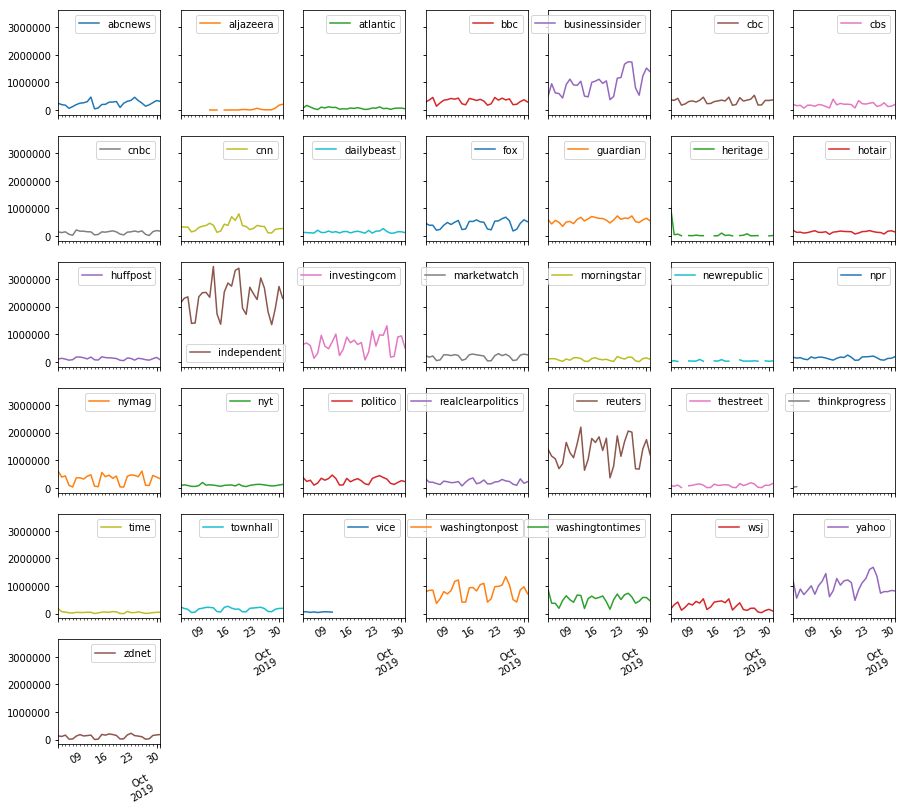

In [13]:
df_size.plot(subplots=True, layout=(6, 7), figsize=(15, 15), sharex=True, sharey=True);

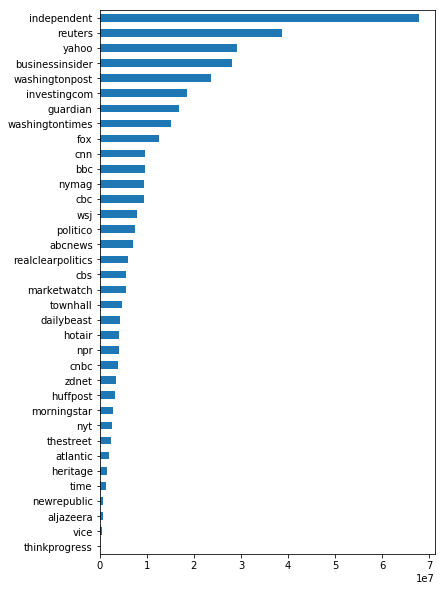

In [14]:
df_size.sum().sort_values().plot.barh(figsize=(6, 10));

In [15]:
(df_size.iloc[-10:].sum()/df_size.iloc[-10:].sum().sum()*100).sort_values()#.plot.barh(figsize=(6,10))

vice                  0.000000
thinkprogress         0.000000
heritage              0.123117
newrepublic           0.230113
time                  0.316616
aljazeera             0.449236
atlantic              0.480673
nyt                   0.719961
thestreet             0.754015
huffpost              0.778265
morningstar           0.859180
zdnet                 0.954944
cnbc                  1.025010
npr                   1.096207
hotair                1.105060
dailybeast            1.109857
wsj                   1.112464
townhall              1.263109
cbs                   1.464485
marketwatch           1.550271
realclearpolitics     1.558297
cnn                   1.880112
politico              2.051297
abcnews               2.180353
bbc                   2.479927
cbc                   2.551468
nymag                 2.681566
fox                   3.590863
washingtontimes       4.164745
guardian              4.455896
investingcom          5.573875
washingtonpost        6.462842
yahoo   

# 일별 아티클당 평균 글자수 추이

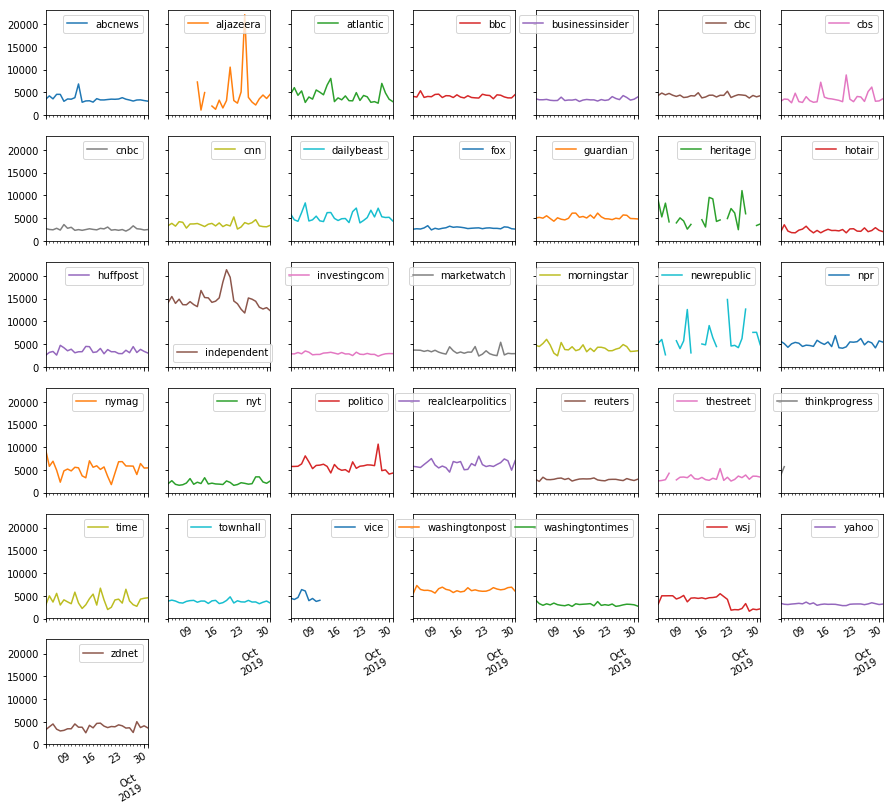

In [16]:
(df_size/df_count).plot(subplots=True, layout=(6, 7), figsize=(15, 15), sharex=True, sharey=True);

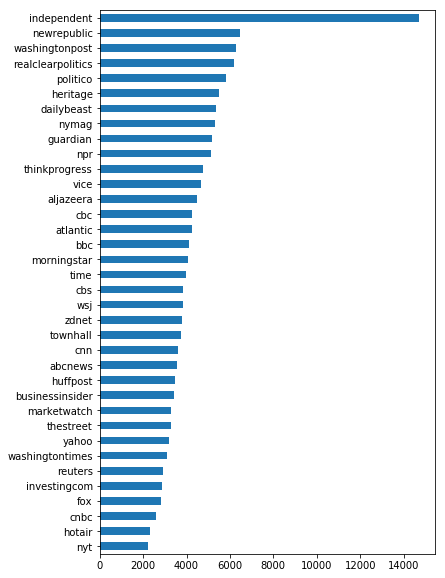

In [17]:
(df_size/df_count).mean().sort_values().plot.barh(figsize=(6, 10));

In [229]:
%load_ext autoreload
%autoreload
%matplotlib inline

from news_crawler import NewsCrawler, news_publishers
from IPython.display import display
import os
import hashlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [230]:
fnames_downloaded = glob.glob('newsdata/downloaded/*.json')
fnames_trashed = glob.glob('newsdata/trashed/*/*.json')

In [226]:
fnames_int = set()
for fname in tqdm(fnames_trashed):
    js = json.loads(Path(fname).read_text())
    
    if js['pub']!='yahoo' and 'yahoo.com' in js['url']:
        fnames_int.add(fname)

In [227]:
len(fnames_int)

0

In [224]:
fnames_int

{'newsdata/downloaded\\004bbc7f3c2590d008cc4af16adb35838a990506.json',
 'newsdata/downloaded\\0c3c5cdb8815f431af832c730de47cf1a4d50148.json',
 'newsdata/downloaded\\0e82020cfca7da98b4f79b2b0228776678210663.json',
 'newsdata/downloaded\\0f2e55a4959f46d438ab34a8a9d69e757e70cfcc.json',
 'newsdata/downloaded\\1692530da9fb1620eeaedd6b95b19da14a8b02e1.json',
 'newsdata/downloaded\\17deb27c1d36a43370ac6b012124d261cbbb4428.json',
 'newsdata/downloaded\\1976a557e3cc00cc32b6f7cc74c290ea5c37b19b.json',
 'newsdata/downloaded\\3e8f95c21f7ca97fc29bedf9aaebc100d7714098.json',
 'newsdata/downloaded\\58f6dfc2190e509104c4183acd2047c706e0c6ac.json',
 'newsdata/downloaded\\595da8bb68cdea20e48812d5f8c1eebbcc778b95.json',
 'newsdata/downloaded\\5e08280c30c6bbeccbf2a8c325f5b8f62f97af84.json',
 'newsdata/downloaded\\63db77083ce8a052408db6517507590f384727b5.json',
 'newsdata/downloaded\\6a15ae52ab31614b9004d88c17c16b15f1b7900a.json',
 'newsdata/downloaded\\6d2eb25aea26bc677b92a8fc28762f498c213d95.json',
 'news

In [225]:
for fname in tqdm(fnames_int):
    js = json.loads(Path(fname).read_text())
    js['pub'] = 'yahoo'
    with open(fname, 'w') as f:
        json.dump(js, f)

In [241]:
fnames_int = set()
for fname in tqdm(fnames_trashed):
    js = json.loads(Path(fname).read_text())
    
    if js['pub']=='chosun':
        fnames_int.add(fname)

In [243]:
fnames_int

{'newsdata/trashed\\006\\006487b4cbefe21a71af7a9a9d8560161b6a52d4.json',
 'newsdata/trashed\\042\\0424b8f058739963bc5968464964cecd64f0432c.json',
 'newsdata/trashed\\058\\0580787537e4d0f6fe3727b737efd67810f691a2.json',
 'newsdata/trashed\\082\\0825a6ea58140de0d4e229679a9dff8fe797bbf9.json',
 'newsdata/trashed\\08d\\08db617846f593f2b60fbf4812cd2e352b2b7f88.json',
 'newsdata/trashed\\08f\\08fae21d1eb98880f80fb0b8bc3ef9ba13a5cecf.json',
 'newsdata/trashed\\091\\09106461851e343307142392588d51f0b79c14f6.json',
 'newsdata/trashed\\09a\\09adc529c401a32f28dd2df929559e861ec5decf.json',
 'newsdata/trashed\\0a3\\0a327655e18828494755dfe0575963789151d5c1.json',
 'newsdata/trashed\\0a6\\0a63e83239ccb68db3f61ff64282ca0f1382ffa0.json',
 'newsdata/trashed\\0b0\\0b0800de052cf40653ecd29caf2a1c2daa417e91.json',
 'newsdata/trashed\\0ba\\0bad577983f1a399779c0884013f2b821350067f.json',
 'newsdata/trashed\\0cb\\0cb9f81435ceb92f47afda2f819b487282e578a6.json',
 'newsdata/trashed\\0f3\\0f30ecf1b0063f0f5f54ed2ffd

In [237]:
for fname in tqdm(fnames_int):
    js = json.loads(Path(fname).read_text())
    print(js['url'])

https://pdf.joins.com/Media/List.aspx?mseq=86
https://joins.com/Media/List.aspx?mseq=209
https://joins.com/Media/List.aspx?mseq=59
https://joins.com/Media/List.aspx?mseq=132
https://joins.com/Media/List.aspx?mseq=84
https://pdf.joins.com/Media/List.aspx?mseq=119
https://joins.com/Media/List.aspx?mseq=19
https://joins.com/Media/List.aspx?mseq=135
https://pdf.joins.com/Media/List.aspx?mseq=110
https://joins.com/Media/List.aspx?mseq=119
https://joins.com/Media/List.aspx?mseq=20
https://joins.com/Media/List.aspx?mseq=156
https://pdf.joins.com/Media/List.aspx?mseq=118
https://news.joins.com/article/23589274
https://joins.com/Media/List.aspx?mseq=86
https://pdf.joins.com/Media/List.aspx?mseq=22
https://joins.com/Media/List.aspx?mseq=100
https://joins.com/Media/List.aspx?mseq=207
https://pdf.joins.com/Media/List.aspx?mseq=193
https://pdf.joins.com/Media/List.aspx?mseq=156
https://koreajoongangdaily.joins.com/news/list/List.aspx?gCat=020901
https://pdf.joins.com/Media/List.aspx?mseq=11
https:/

https://joins.com/Media/List.aspx?mseq=189
https://joins.com/Media/List.aspx?mseq=142
https://koreajoongangdaily.joins.com/news/list/List.aspx?gCat=030501
https://pdf.joins.com/Media/List.aspx?mseq=79
https://joins.com/Media/List.aspx?mseq=125
https://joins.com/Media/List.aspx?mseq=21
https://pdf.joins.com/Media/List.aspx?mseq=24
https://pdf.joins.com/Media/List.aspx?mseq=94
https://pdf.joins.com/Media/List.aspx?mseq=99
https://joins.com/Media/List.aspx?mseq=168
https://pdf.joins.com/Media/List.aspx?mseq=107
https://koreajoongangdaily.joins.com/news/list/List.aspx?gCat=020101
https://pdf.joins.com/Media/List.aspx?mseq=112
https://koreajoongangdaily.joins.com/news/list/List.aspx?gCat=010201
https://koreajoongangdaily.joins.com/news/list/List.aspx?gCat=050101
https://pdf.joins.com/Media/List.aspx?mseq=142
https://joins.com/Media/List.aspx?mseq=107
https://joins.com/Media/List.aspx?mseq=130
https://pdf.joins.com/Media/List.aspx?mseq=168
https://pdf.joins.com/Media/List.aspx?mseq=210
https

In [202]:
pubs = news_publishers.src.keys()

In [203]:
df_dups = {}
for fname in tqdm(fnames_int):
    js = json.loads(Path(fname).read_text())
    url = js['url']
    pub = js['pub']
    thepubs = [p for p in pubs if p in url]
    
    if 'time' in thepubs: thepubs.remove('time')
    if 'rt' in thepubs: thepubs.remove('rt')
    
    df_dups[fname] = [url, pub, ','.join(thepubs)]

df_dups = pd.DataFrame.from_dict(df_dups, orient='index', columns=['url', 'pub', 'thepub'])
df_dups = df_dups[df_dups.thepub!='']

In [204]:
df_dups = df_dups[~df_dups.url.str.contains('businesstimes')]
df_dups = df_dups[~df_dups.url.str.contains('barrons.com')]
df_dups = df_dups[~df_dups.url.str.contains('thecut.com')]
df_dups = df_dups[~df_dups.url.str.contains('vulture.com')]
df_dups = df_dups[~df_dups.url.str.contains('mansionglobal.com')]
df_dups = df_dups[~df_dups.url.str.contains('kotaku.com')]
df_dups = df_dups[~df_dups.url.str.contains('gizmodo.com')]
df_dups = df_dups[~df_dups.url.str.contains('pedestrian.tv')]
df_dups = df_dups[~df_dups.url.str.contains('newsbtc.com')]
df_dups = df_dups[~df_dups.url.str.contains('realcleardefense.com')]
df_dups = df_dups[~df_dups.url.str.contains('thelily.com')]
df_dups = df_dups[~df_dups.url.str.contains('twitchy.com')]
df_dups = df_dups[~df_dups.url.str.contains('lifehacker.com')]
df_dups = df_dups[~df_dups.url.str.contains('insidehook.com')]
df_dups = df_dups[~df_dups.url.str.contains('thestrategist.co')]
df_dups = df_dups[~df_dups.url.str.contains('registerguard.com')]
df_dups = df_dups[~df_dups.url.str.contains('washingtonexaminer.com')]
df_dups = df_dups[~df_dups.url.str.contains('thenation.com')]
df_dups = df_dups[~df_dups.url.str.contains('theweek.com')]
df_dups = df_dups[~df_dups.url.str.contains('bleacherreport.com')]
df_dups = df_dups[~df_dups.url.str.contains('bearingarms.com')]
df_dups = df_dups[~df_dups.url.str.contains('publicintegrity.org')]
df_dups = df_dups[~df_dups.url.str.contains('dailycaller.com')]
df_dups = df_dups[~df_dups.url.str.contains('msn.com')]
df_dups = df_dups[~df_dups.url.str.contains('arysports.tv')]
df_dups = df_dups[~df_dups.url.str.contains('redstate.com')]
df_dups = df_dups[~df_dups.url.str.contains('salon.com')]

In [218]:
list(df_dups.url)

['https://theatlantic.com/business/archive/2016/05/car-alarms-dont-work-why-so-common/482769',
 'https://nymag.com/intelligencer/2019/08/biden-posts-video-of-obama-complimenting-him.html',
 'https://thisismoney.co.uk/news/article-7462263/Car-makers-leave-handbrakes-future-switch-electronic-devices.html',
 'https://hotair.com/archives/ed-morrissey/2019/09/23/biden-2018-youre-damn-right-ordered-us-aid-money-code-red-ukraine-prosecutor-going-sons-company',
 'https://foxnews.com/science/teen-builds-working-nuclear-fusion-reactor-in-memphis-home',
 'https://washingtonpost.com/opinions/2019/05/08/why-joe-bidens-alleged-ukraine-conspiracy-doesnt-hold-up',
 'https://npr.org/2016/09/21/494883725/trump-says-african-americans-are-in-their-worst-shape-ever-the-data-disagrees',
 'https://mirror.co.uk/news/weird-news/you-can-now-visit-5d-14228433',
 'https://theamericanconservative.com/articles/brexit-how-can-it-be-a-coup-if-the-people-voted-for-it',
 'https://usatoday.com/story/opinion/2019/09/26/t

In [220]:
sum(df_dups.url.str.contains('yahoo.com'))

29

In [20]:
def makedir_if_not_exists(file):
    _dir = os.path.dirname(file)

    if not os.path.isdir(_dir):
        os.makedirs(_dir)

In [21]:
for fname in tqdm(fnames_trashed):
    file = Path(fname)
    js = json.loads(file.read_text())
    basename = os.path.basename(fname)
    fname_new = os.path.join('newsdata', 'trashed', basename[:3], basename)
    
    makedir_if_not_exists(fname_new)
    with open(fname_new, 'w') as f:
        json.dump(js, f)
     
    file.unlink()

In [47]:
urls_trashed = {} 

for fname in tqdm(fnames_trashed):
    js = json.loads(Path(fname).read_text())
    
    if 'error' in js: continue
    
    pub = js['pub']
    url = js['url']

    if pub not in urls_trashed:
        urls_trashed[pub] = set()

    urls_trashed[pub].add(url)

In [49]:
urls_trashed

{}

In [48]:
len(set.union(*urls_trashed.values()))

TypeError: descriptor 'union' of 'set' object needs an argument

In [35]:
crawler = NewsCrawler()

In [36]:
crawler.urls_selected = {'zdnet': {'https://www.zdnet.de/2096276/micrografx-kuendigt-picture-publisher-10-an/#comment-909929'}} #urls_trashed

In [37]:
download_results = crawler.download2(); download_results

100.00% (1.57 seconds): downloading... zdnet               

,downloaded,trashed
zdnet,0,1


In [9]:
crawler.urls_final

In [43]:
for url in set.union(*urls_trashed.values()):
    hash_url = hashlib.sha1(url.encode('utf-8')).hexdigest()
    file = os.path.join('newsdata', 'trashed', hash_url[:3], hash_url + '.json')
    Path(file).unlink()

In [33]:
len(npapers.article_urls())

6

In [38]:
hashlib.sha1('https://www.zdnet.de/2096276/micrografx-kuendigt-picture-publisher-10-an'.encode('utf-8')).hexdigest()

'ebfc3a931c37caa7605c3d4a67abd1d484f3cb8f'

In [20]:
clean_url('zdnet', 'https://www.zdnet.de/2096276/micrografx-kuendigt-picture-publisher-10-an/#comment-909929')

'https://www.zdnet.de/2096276/micrografx-kuendigt-picture-publisher-10-an'

In [ ]:
{'zdnet': {'https://www.zdnet.de/2096276/micrografx-kuendigt-picture-publisher-10-an/#comment-909929'}}